In [1]:
###Logistic Regression
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/', download = True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root = 'data/', train = False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2084E4AAB38>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label : 5


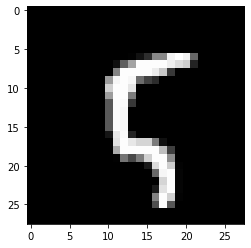

In [10]:
image, label = dataset[100]
plt.imshow(image, cmap = 'gray')
print('Label :', label)

In [12]:
import torchvision.transforms as transforms

In [13]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [23]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [24]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


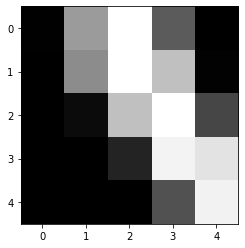

In [25]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray');

In [28]:
import numpy as np
def split_indices(n, val_pct):
    # Determine size of validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [29]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [30]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [30184 13622 42428 11745 31832 47122 17216 18078 12436 29275 37622 49825
 10059 17605 46472 36065 31547  1602 33042 12693]


In [31]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [39]:
batch_size=100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size, 
                          sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size, 
                        sampler=val_sampler)

In [40]:
import jovian

In [34]:
#jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/arbaza/logistic-regression


'https://jovian.ai/arbaza/logistic-regression'

In [41]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [42]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0353,  0.0147, -0.0283,  ..., -0.0125,  0.0210, -0.0327],
        [ 0.0223,  0.0035,  0.0308,  ...,  0.0079, -0.0208, -0.0033],
        [ 0.0249,  0.0018, -0.0106,  ...,  0.0348,  0.0224,  0.0001],
        ...,
        [ 0.0321, -0.0019,  0.0184,  ..., -0.0050, -0.0094,  0.0023],
        [-0.0238, -0.0355,  0.0092,  ...,  0.0229, -0.0213, -0.0203],
        [-0.0326,  0.0078, -0.0307,  ...,  0.0188,  0.0244,  0.0139]],
       requires_grad=True)

In [43]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0012,  0.0105, -0.0125, -0.0301, -0.0058,  0.0281,  0.0125, -0.0073,
         0.0221, -0.0218], requires_grad=True)

In [48]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([9, 0, 1, 5, 1, 5, 8, 2, 4, 1, 0, 1, 2, 7, 5, 1, 7, 7, 3, 2, 8, 1, 5, 6,
        3, 1, 4, 1, 6, 9, 6, 1, 9, 3, 7, 5, 3, 2, 3, 3, 0, 2, 6, 2, 9, 5, 2, 3,
        1, 2, 4, 9, 2, 0, 5, 6, 0, 3, 1, 3, 1, 1, 7, 7, 9, 5, 7, 8, 1, 4, 0, 5,
        5, 0, 8, 7, 3, 3, 1, 2, 7, 5, 6, 0, 8, 4, 4, 3, 2, 8, 5, 6, 7, 2, 2, 7,
        1, 9, 7, 1])
torch.Size([100, 1, 28, 28])


In [45]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [46]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0236,  0.0186,  0.0213,  ..., -0.0203, -0.0135,  0.0242],
         [-0.0142, -0.0118, -0.0055,  ..., -0.0236, -0.0239, -0.0167],
         [-0.0262,  0.0156,  0.0011,  ..., -0.0039,  0.0348, -0.0021],
         ...,
         [-0.0231,  0.0125,  0.0069,  ..., -0.0082, -0.0040,  0.0026],
         [-0.0307,  0.0208,  0.0235,  ..., -0.0136,  0.0061,  0.0117],
         [-0.0106,  0.0342,  0.0297,  ...,  0.0194,  0.0329,  0.0268]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0097, -0.0100,  0.0057,  0.0169,  0.0271, -0.0339, -0.0302, -0.0187,
          0.0146,  0.0213], requires_grad=True)]

In [47]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.3694, -0.1806, -0.4554, -0.5797, -0.3114, -0.2344, -0.0413, -0.2309,
          0.2419,  0.1082],
        [-0.0123,  0.1515, -0.1285, -0.2600,  0.1753,  0.0129,  0.0767,  0.1662,
          0.2889,  0.0937]])


In [49]:
import torch.nn.functional as F


In [50]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0570, 0.0982, 0.0858, 0.0825, 0.1019, 0.0927, 0.1012, 0.1044, 0.1607,
         0.1157],
        [0.0896, 0.1196, 0.0925, 0.0809, 0.0858, 0.0785, 0.1114, 0.1000, 0.1446,
         0.0970]])
Sum:  0.9999998807907104


In [54]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
#print(max_probs)

tensor([8, 8, 2, 8, 7, 8, 7, 9, 8, 8, 8, 7, 2, 8, 9, 3, 9, 8, 7, 8, 8, 7, 1, 8,
        8, 1, 8, 7, 6, 8, 8, 7, 2, 1, 8, 8, 4, 6, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8,
        2, 8, 8, 0, 4, 8, 6, 8, 8, 8, 7, 8, 2, 4, 1, 8, 8, 1, 9, 8, 4, 8, 8, 2,
        8, 8, 8, 1, 1, 9, 4, 8, 9, 8, 2, 8, 1, 9, 8, 8, 8, 7, 2, 8, 1, 2, 8, 8,
        7, 9, 8, 7])


In [55]:
labels

tensor([9, 0, 1, 5, 1, 5, 8, 2, 4, 1, 0, 1, 2, 7, 5, 1, 7, 7, 3, 2, 8, 1, 5, 6,
        3, 1, 4, 1, 6, 9, 6, 1, 9, 3, 7, 5, 3, 2, 3, 3, 0, 2, 6, 2, 9, 5, 2, 3,
        1, 2, 4, 9, 2, 0, 5, 6, 0, 3, 1, 3, 1, 1, 7, 7, 9, 5, 7, 8, 1, 4, 0, 5,
        5, 0, 8, 7, 3, 3, 1, 2, 7, 5, 6, 0, 8, 4, 4, 3, 2, 8, 5, 6, 7, 2, 2, 7,
        1, 9, 7, 1])

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arbaza/logistic-regression" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/arbaza/logistic-regression


'https://jovian.ai/arbaza/logistic-regression'

In [57]:
#Evaluation Metric and Loss Function
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [58]:
accuracy(preds, labels)

0.08

In [61]:
loss_fn = F.cross_entropy

In [62]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)


tensor(2.3336, grad_fn=<NllLossBackward>)


In [63]:
#Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [67]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [65]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [68]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [69]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3299, Accuracy: 0.1163


In [71]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [72]:
# Redifine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [73]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

c:\users\arbaz\anaconda3\envs\cmpt-f726\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch [1/5], Loss: 1.8596, accuracy: 0.6971
Epoch [2/5], Loss: 1.5615, accuracy: 0.7693
Epoch [3/5], Loss: 1.3531, accuracy: 0.7897
Epoch [4/5], Loss: 1.2038, accuracy: 0.8044
Epoch [5/5], Loss: 1.0931, accuracy: 0.8159


In [74]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0083, accuracy: 0.8236
Epoch [2/5], Loss: 0.9416, accuracy: 0.8294
Epoch [3/5], Loss: 0.8876, accuracy: 0.8353
Epoch [4/5], Loss: 0.8431, accuracy: 0.8398
Epoch [5/5], Loss: 0.8057, accuracy: 0.8433


In [75]:
 fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7738, accuracy: 0.8468
Epoch [2/5], Loss: 0.7463, accuracy: 0.8488
Epoch [3/5], Loss: 0.7222, accuracy: 0.8512
Epoch [4/5], Loss: 0.7010, accuracy: 0.8543
Epoch [5/5], Loss: 0.6822, accuracy: 0.8567


In [76]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6653, accuracy: 0.8582
Epoch [2/5], Loss: 0.6500, accuracy: 0.8598
Epoch [3/5], Loss: 0.6362, accuracy: 0.8611
Epoch [4/5], Loss: 0.6236, accuracy: 0.8622
Epoch [5/5], Loss: 0.6120, accuracy: 0.8637


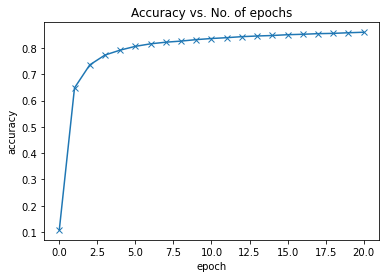

In [77]:
# Replace these values with your results
accuracies = [0.1076, 0.6486, 0.7362, 0.7737, 0.7925, 0.8069, 
              0.8165, 0.8227, 0.8269, 0.8325, 0.8367,
              0.8399, 0.8438, 0.8463, 0.8482, 0.8512,
              0.8529, 0.8552, 0.8563, 0.8587, 0.8606]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [78]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


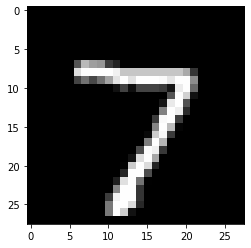

In [81]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [82]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [83]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 9 , Predicted: 7


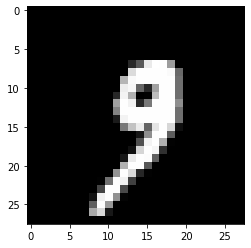

In [86]:
img, label = test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [87]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5951, Accuracy: 0.8686


In [88]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [89]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0136, -0.0016,  0.0338,  ...,  0.0331, -0.0132,  0.0069],
                      [-0.0262, -0.0113,  0.0065,  ..., -0.0150,  0.0253, -0.0348],
                      [-0.0073,  0.0138,  0.0157,  ..., -0.0212,  0.0059, -0.0164],
                      ...,
                      [ 0.0039, -0.0036, -0.0348,  ...,  0.0053,  0.0190,  0.0276],
                      [ 0.0238, -0.0183, -0.0186,  ...,  0.0263, -0.0231, -0.0007],
                      [-0.0244,  0.0020, -0.0166,  ..., -0.0325, -0.0238,  0.0201]])),
             ('linear.bias',
              tensor([-0.0214,  0.0830, -0.0610, -0.0037,  0.0522,  0.0494,  0.0219,  0.0742,
                      -0.1089, -0.0415]))])

In [90]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0136, -0.0016,  0.0338,  ...,  0.0331, -0.0132,  0.0069],
                      [-0.0262, -0.0113,  0.0065,  ..., -0.0150,  0.0253, -0.0348],
                      [-0.0073,  0.0138,  0.0157,  ..., -0.0212,  0.0059, -0.0164],
                      ...,
                      [ 0.0039, -0.0036, -0.0348,  ...,  0.0053,  0.0190,  0.0276],
                      [ 0.0238, -0.0183, -0.0186,  ...,  0.0263, -0.0231, -0.0007],
                      [-0.0244,  0.0020, -0.0166,  ..., -0.0325, -0.0238,  0.0201]])),
             ('linear.bias',
              tensor([-0.0214,  0.0830, -0.0610, -0.0037,  0.0522,  0.0494,  0.0219,  0.0742,
                      -0.1089, -0.0415]))])

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arbaza/logistic-regression" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/arbaza/logistic-regression


'https://jovian.ai/arbaza/logistic-regression'

In [ ]:
jovian.commit(artifacts=['mnist-logistic.pth'])

[jovian] Error: "artifacts" is deprecated. Use "outputs" instead


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
